<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-Model/blob/main/brain_tumorDetectionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_31.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
path = "/content/archive_3"

image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2, 
    validation_split=0.1)    
dir1='/content/archive_3/train'
training_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=dir1,
                                                 shuffle=True,
                                                 target_size=(256,256), 
                                                 subset="training",
                                                 color_mode='rgb',
                                                 class_mode='binary')

dir2='/content/archive_3/validation'
validation_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=dir2,
                                                 shuffle=True,
                                                 target_size=(256,256), 
                                                 subset="validation",
                                                 color_mode='rgb',
                                                 class_mode='binary')

Found 1614 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [24]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_5 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [26]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = model.fit(traindata, epochs=30, validation_data=validationdata)

Epoch 1/30
112/112 [==============================] - 323s 3s/step - loss: 0.8265 - accuracy: 0.7567 - val_loss: 1.3595 - val_accuracy: 0.4735
Epoch 2/30
112/112 [==============================] - 269s 2s/step - loss: 0.3089 - accuracy: 0.8744 - val_loss: 0.8328 - val_accuracy: 0.6043
Epoch 3/30
112/112 [==============================] - 309s 3s/step - loss: 0.1749 - accuracy: 0.9275 - val_loss: 0.7486 - val_accuracy: 0.5844
Epoch 4/30
112/112 [==============================] - 271s 2s/step - loss: 0.1245 - accuracy: 0.9542 - val_loss: 0.3994 - val_accuracy: 0.8593
Epoch 5/30
112/112 [==============================] - 310s 3s/step - loss: 0.0761 - accuracy: 0.9688 - val_loss: 0.3248 - val_accuracy: 0.8858
Epoch 6/30
112/112 [==============================] - 308s 3s/step - loss: 0.0596 - accuracy: 0.9805 - val_loss: 0.2436 - val_accuracy: 0.9437
Epoch 7/30
112/112 [==============================] - 271s 2s/step - loss: 0.0321 - accuracy: 0.9877 - val_loss: 0.2915 - val_accuracy: 0.9421

In [29]:
model.evaluate(validationdata )

76/76 [==============================] - 54s 710ms/step - loss: 0.4393 - accuracy: 0.9536


[0.4392990171909332, 0.9536423683166504]

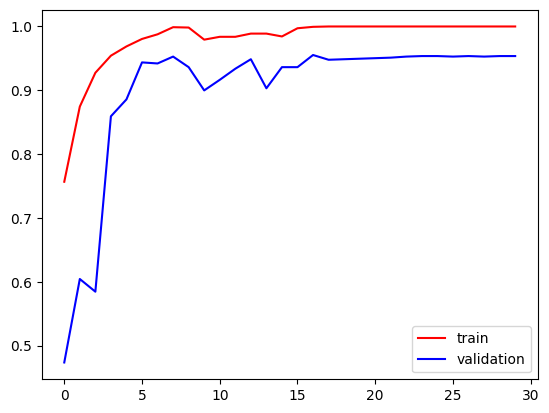

In [31]:

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

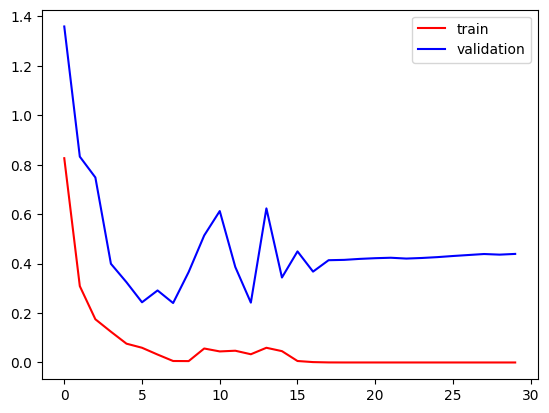

In [32]:

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()
     

In [33]:
import numpy as np
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.75)

test_data = datagen.flow_from_directory(
    dir2,
    target_size=(256, 256),
    batch_size= 32,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)


Found 906 images belonging to 2 classes.
29/29 [==============================] - 41s 1s/step


In [34]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

29/29 [==============================] - 41s 1s/step - loss: 3.4702 - accuracy: 0.5596
Test Loss: 3.4702072143554688
Test Accuracy: 0.559602677822113


1/1 [==============================] - 1s 1s/step


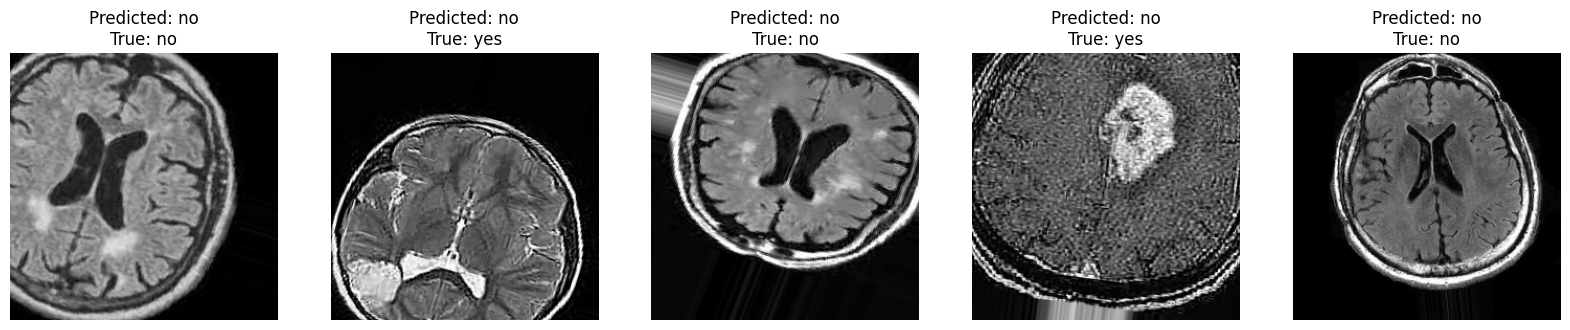

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Get a few images from the test set
num_images = 5
test_images, test_labels = next(test_data)

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [36]:
model.save("./Modecnn.h5")